In [2]:
#Import if path is not correctly setted
import os, sys
print(os.getcwd())
sys.path.append(os.getcwd()+"/../..")

##Imports:
import matplotlib.pyplot as plt
import math
import numpy as np
import itertools as it

%matplotlib inline

#Ensembler Packages
import ensembler.potentials.TwoD as potentials
import ensembler.visualisation.plotPotentials as vis
test_timing_with_points =100



c:\Users\benja\OneDrive - ETH Zürich\PhD\Code\ensembler_public\examples\dev


# Harmonic Oscilator

harmonicOscilator
	States: 1
	Dimensions: nDim

	Functional:
 		V:	Sum(Matrix([
[0.5*k_0*(r_0 - r_shift0)**2],
[0.5*k_1*(r_1 - r_shift1)**2]])[i, 0], (i, 0, nDim - 1))
		dVdpos:	Matrix([[Sum(Matrix([
[0.5*k_0*(2*r_0 - 2*r_shift0)],
[                           0]])[i, 0], (i, 0, nDim - 1))], [Sum(Matrix([
[                           0],
[0.5*k_1*(2*r_1 - 2*r_shift1)]])[i, 0], (i, 0, nDim - 1))]])

	Simplified Function
		V:	Sum(Matrix([
[0.5*r_0**2],
[0.5*r_1**2]])[i, 0], (i, 0, 1))
		dVdpos:	Matrix([[Sum(Matrix([
[1.0*r_0],
[      0]])[i, 0], (i, 0, 1))], [Sum(Matrix([
[      0],
[1.0*r_1]])[i, 0], (i, 0, 1))]])

	Constants: 
		nDim: 			2
		k_0: 			1.0
		k_1: 			1.0
		r_shift0: 			0.0
		r_shift1: 			0.0
		V_off_0: 			0.0
		V_off_1: 			0.0
		state: 			1


calculate 100 positions: 
Wall time: 0 ns

Visualization


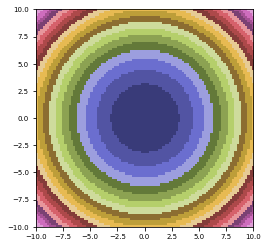

In [3]:
positions = np.linspace(-10,10, test_timing_with_points)
positions2D = np.array(list(it.product(positions, positions)))

V = potentials.harmonicOscillator()
print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
ene = V.ene(positions2D)
plt.imshow(ene.reshape(test_timing_with_points, test_timing_with_points), extent=[min(positions), max(positions), min(positions), max(positions)], cmap="tab20b")


# Wave Potential

Wave Potential
	States: 1
	Dimensions: nDim

	Functional:
 		V:	Sum(Matrix([
[amp_0*cos(mult_0*(phase_0 + pos_0)) + yOff_0],
[amp_1*cos(mult_1*(phase_1 + pos_1)) + yOff_1]])[i, 0], (i, 0, nDim - 1))
		dVdpos:	Matrix([[Sum(Matrix([
[-amp_0*mult_0*sin(mult_0*(phase_0 + pos_0))],
[                                          0]])[i, 0], (i, 0, nDim - 1))], [Sum(Matrix([
[                                          0],
[-amp_1*mult_1*sin(mult_1*(phase_1 + pos_1))]])[i, 0], (i, 0, nDim - 1))]])

	Simplified Function
		V:	Sum(Matrix([
[cos(2*pos_0)],
[cos(2*pos_1)]])[i, 0], (i, 0, 1))
		dVdpos:	Matrix([[Sum(Matrix([
[-2*sin(2*pos_0)],
[              0]])[i, 0], (i, 0, 1))], [Sum(Matrix([
[              0],
[-2*sin(2*pos_1)]])[i, 0], (i, 0, 1))]])

	Constants: 
		k_0: 			1.0
		k_1: 			1.0
		r_shift0: 			0.0
		r_shift1: 			0.0
		V_off_0: 			0.0
		V_off_1: 			0.0
		nDim: 			2
		amp_0: 			1
		amp_1: 			1
		mult_0: 			2
		mult_1: 			2
		phase_0: 			0
		phase_1: 			0
		yOff_0: 			0
		yOff_1: 			0


cal

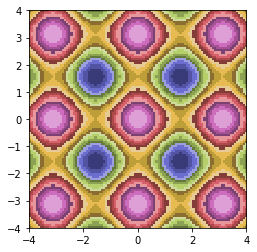

In [3]:
positions = np.linspace(-4,4, test_timing_with_points)
positions2D = np.array(list(it.product(positions, positions)))

V = potentials.wavePotential(multiplicity=[2,2])
print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
ene = V.ene(positions2D)
plt.imshow(ene.reshape(test_timing_with_points, test_timing_with_points), extent=[min(positions), max(positions), min(positions), max(positions)], cmap="tab20b")